In [2]:
# Dataset = https://github.com/owid/covid-19-data/tree/master/public/data
# https://github.com/MoH-Malaysia/covid19-public/tree/main/epidemic
%matplotlib notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Read file into dataframe
globaldf = pd.read_csv("owid-covid-data.csv")
icu = pd.read_csv('icu.csv')

# Filter data for Malaysia only
msiadf = globaldf[globaldf['location'] == 'Malaysia']

# Filter the columns to observe and analyse
datacols = ['date','population','people_fully_vaccinated','new_cases_smoothed']
msiadf = msiadf[datacols]
msiadf.reset_index(drop = True, inplace = True)

# Deriving the % of pop who are fully vaccinated
msiadf['fully_vax_rate'] = msiadf.people_fully_vaccinated/msiadf.population

# Aggregating the sum of individuals who are Covid-19 positive under intensive care and mechanically ventilated.
icu = icu.groupby('date').agg(icu = ('icu_covid',sum), ventilated = ('vent_covid',sum)).reset_index()

# Deriving the 7-day moving average
icu ['icu'] = icu.icu.rolling(window=7).mean()
icu ['ventilated'] = icu.ventilated.rolling(window=7).mean()

# Merging the datases to combine the data we want to analyse
datadf = msiadf.merge(icu, how = 'left')
datadf['icu_rate'] = datadf.icu/datadf.new_cases_smoothed
datadf['vent_rate'] = datadf.ventilated/datadf.new_cases_smoothed
datadf = datadf[datadf['date']> '2021-02-28']
datadf = datadf.dropna().round(decimals = 5).reset_index(drop = True)
datadf

,date,population,people_fully_vaccinated,new_cases_smoothed,fully_vax_rate,icu,ventilated,icu_rate,vent_rate
0,2021-03-01,32776195.0,25.0,2402.714,0.00000,260.14286,133.28571,0.10827,0.05547
1,2021-03-02,32776195.0,30.0,2272.286,0.00000,259.00000,130.00000,0.11398,0.05721
2,2021-03-03,32776195.0,36.0,2015.143,0.00000,255.14286,129.42857,0.12661,0.06423
3,2021-03-04,32776195.0,51.0,2035.000,0.00000,249.28571,127.42857,0.12250,0.06262
4,2021-03-05,32776195.0,57.0,2020.857,0.00000,245.57143,125.00000,0.12152,0.06185
...,...,...,...,...,...,...,...,...,...
348,2022-02-12,32776195.0,25732145.0,16433.143,0.78509,149.57143,79.71429,0.00910,0.00485
349,2022-02-13,32776195.0,25732865.0,18002.143,0.78511,156.71429,85.14286,0.00871,0.00473
350,2022-02-14,32776195.0,25734409.0,19903.000,0.78516,165.85714,90.00000,0.00833,0.00452
351,2022-02-15,32776195.0,25736111.0,20640.714,0.78521,173.85714,97.00000,0.00842,0.00470


<IPython.core.display.Javascript object>


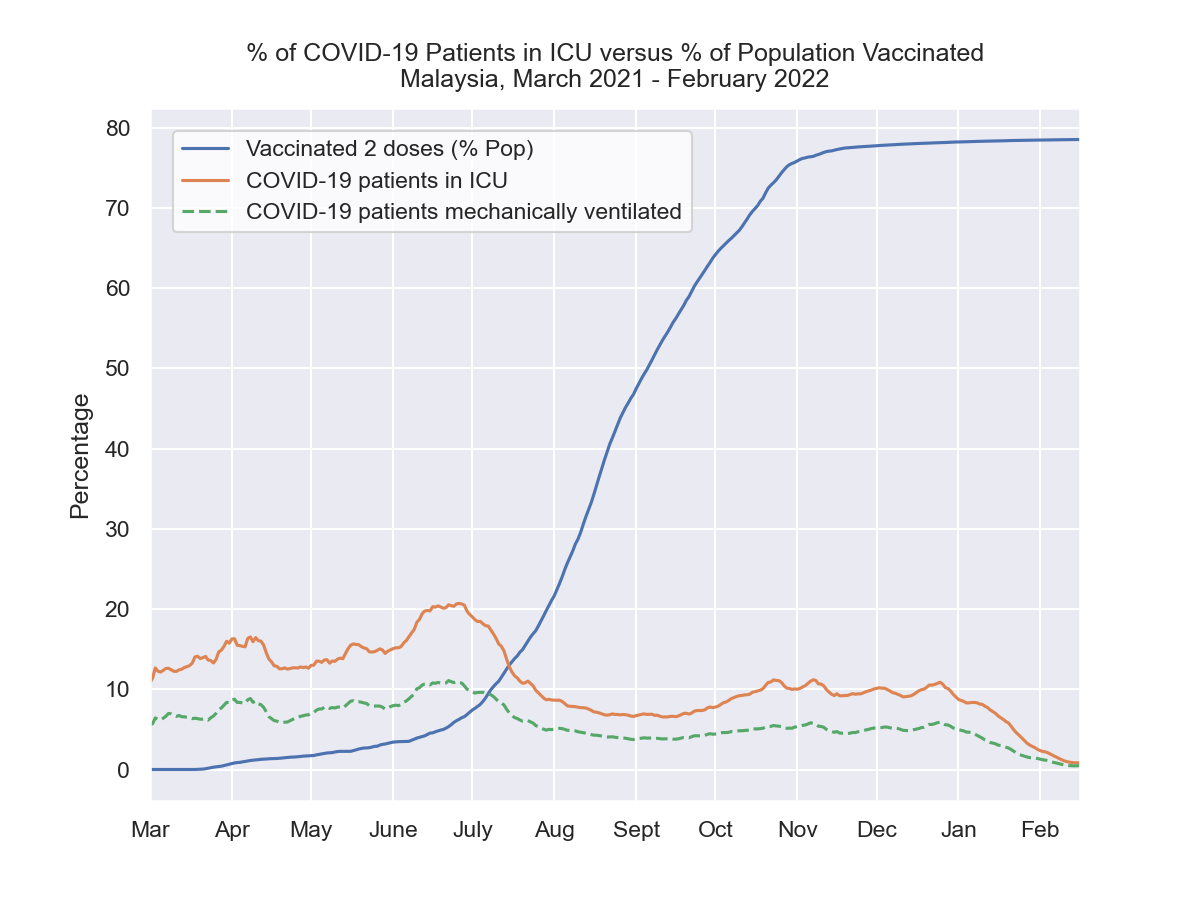

In [4]:
plt.style.use('seaborn-colorblind')
sns.set_theme()
plt.figure(figsize = (8,6))
plt.margins(x = 0)

sns.lineplot(x = datadf['date'], y = datadf['fully_vax_rate']*100);
sns.lineplot(x = datadf['date'], y = datadf['icu_rate']*100);
sns.lineplot(x = datadf['date'], y = datadf['vent_rate']*100, linestyle = 'dashed');

# Set axis label, title, and legend
plt.ylabel('Percentage', labelpad = 6)
plt.xlabel('')
plt.title("% of COVID-19 Patients in ICU versus % of Population Vaccinated\nMalaysia, March 2021 - February 2022", pad = 10)
plt.legend(loc=2, frameon=True, facecolor='white', borderaxespad=1,
           labels = ["Vaccinated 2 doses (% Pop)", 'COVID-19 patients in ICU', 'COVID-19 patients mechanically ventilated'])

# Set ticks
mo = ["Mar",'Apr','May','June','July','Aug','Sept','Oct','Nov','Dec',"Jan",'Feb']
# This will create a list of day numbers corresponding to the beginning of each month i.e. 0(March), 31(Feb), ... 
ticks = [(dt.date(2021,m,1)-dt.date(2021,3,1)).days for m in range(3,13)]
for m in range(1,3):
    ticks.append((dt.date(2022,m,1)-dt.date(2021,3,1)).days)
plt.xticks(ticks, mo);

yaxist = np.arange(0,90,10)
plt.yticks(yaxist);

plt.savefig('icu_vs_vaxrate.png')